<a href="https://colab.research.google.com/github/god-konw/Source-Code/blob/master/1_DataProcessT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True) 

Mounted at /content/drive


In [ ]:
path = 'drive/MyDrive/Colab Notebooks/'

In [ ]:
import numpy as np  # for array
import pandas as pd  # for csv files and dataframe
import matplotlib.pyplot as plt  # for plotting
import seaborn as sns  # plotting
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
train = pd.read_csv(path+'datasets/test.csv')

In [ ]:
train.shape

(82332, 45)

In [ ]:
train['service'].value_counts()

-           47153
dns         21367
http         8287
smtp         1851
ftp          1552
ftp-data     1396
pop3          423
ssh           204
ssl            30
snmp           29
dhcp           26
radius          9
irc             5
Name: service, dtype: int64

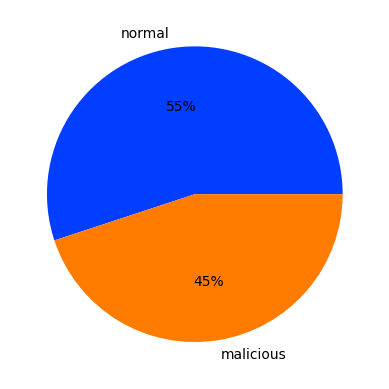

In [ ]:
#define data
data = train['label'].value_counts()
labels = ['normal', 'malicious']

#define Seaborn color palette to use
colors = sns.color_palette('bright')[0:2]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

In [ ]:
train['service'].value_counts()

-           47153
dns         21367
http         8287
smtp         1851
ftp          1552
ftp-data     1396
pop3          423
ssh           204
ssl            30
snmp           29
dhcp           26
radius          9
irc             5
Name: service, dtype: int64

In [ ]:
train['service'] = train['service'].apply(lambda x:'None' if x== '-' else x)
train['is_ftp_login'] = np.where(train['is_ftp_login']>1, 1, train['is_ftp_login'])

In [ ]:
def multi_corr(col1, col2="label", df=train):
    corr = df[[col1, col2]].corr().iloc[0,1]
    log_corr = df[col1].apply(np.log1p).corr(df[col2])
    print("Correlation : {}\nlog_Correlation: {}".format(corr, log_corr))

In [ ]:
def corr(col1, col2="label", df=train):
    return df[[col1, col2]].corr().iloc[0,1]

<ipython-input-15-8bba86b76ec4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = train.corr(method=method)


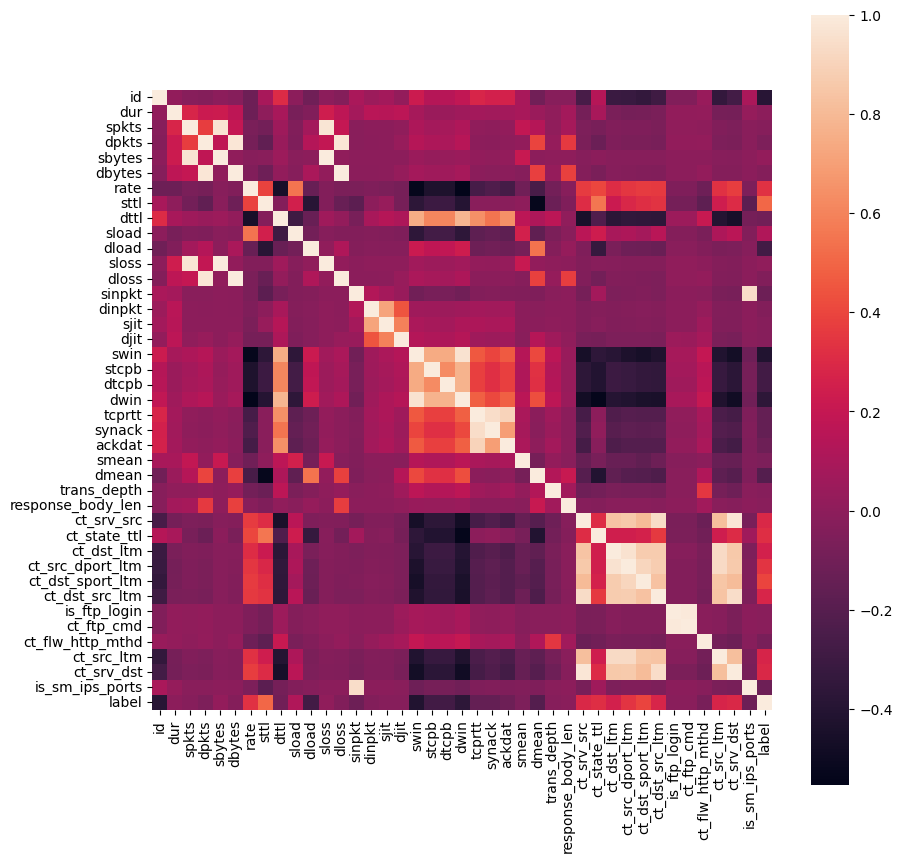

In [ ]:
method = "pearson"
corr_mat = train.corr(method=method)

plt.figure(figsize=(10,10)) 
sns.heatmap(corr_mat, square=True)
plt.show()

In [ ]:
limit = 0.9
columns = corr_mat.columns
for i in range(corr_mat.shape[0]):
    for j in range(i+1, corr_mat.shape[0]):
        if corr_mat.iloc[i, j] >= 0.9:
            print(f"{columns[i]:20s} {columns[j]:20s} {corr_mat.iloc[i, j]}")

NameError: ignored

In [ ]:
normal = train[train['label']==0]
malicious = train[train['label']==1]

In [ ]:
def col_countplot(col, train_data=train):
    fig, ax = plt.subplots(figsize=(8,4))
    sns.set_style('whitegrid')
    ax = sns.countplot(x=col, hue='label', data=train_data)
    ax.legend(loc="upper right", labels=('normal', 'attack'))
    ax.set_title("train data")
    plt.xticks(rotation=45)
    plt.show()
# Plotting pdf of numerical columns
def dual_plot(col, data1=normal, data2=malicious, label1='normal', label2='anomaly', method=None):
    """
    This function plots pdf of the given feature on attack and non-attck data
    """
    if method != None:
        sns.set_style('whitegrid')
        sns.distplot(data1[col].apply(method), label=label1, hist=False, rug=True)
        sns.distplot(data2[col].apply(method), label=label2, hist=False, rug=True)
    else:
        sns.set_style('whitegrid')
        sns.distplot(data1[col], label=label1, hist=False, rug=True)
        sns.distplot(data2[col], label=label2, hist=False, rug=True)
    plt.legend()
def reduce_column(s, to_keep):
    s = s.lower().strip()
    if s not in to_keep:
        return "others"
    else:
        return s

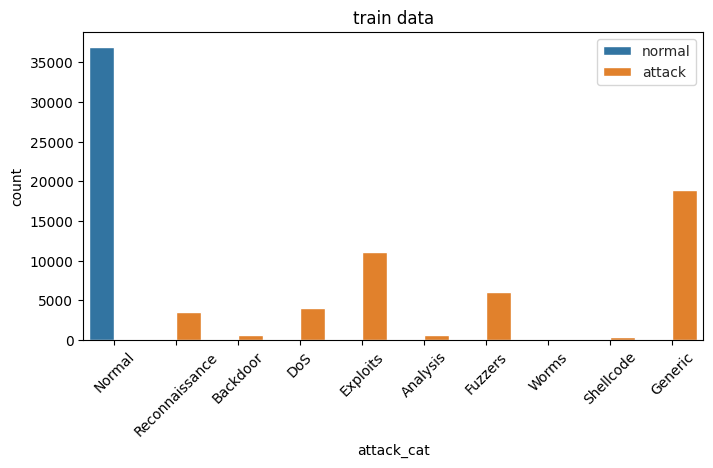

In [ ]:
col_countplot('attack_cat')

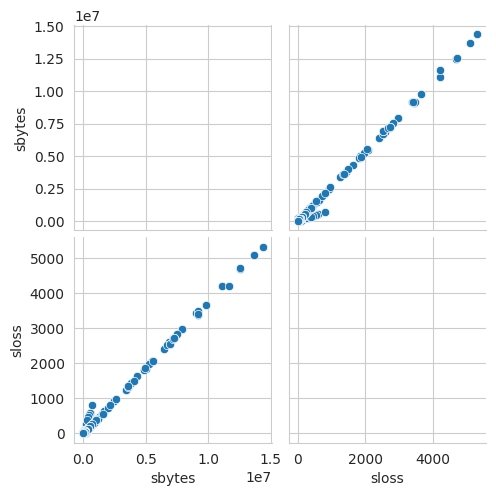

In [ ]:
sns.set_style("whitegrid")
sns.pairplot(data=train, vars=['sbytes', 'sloss'])
plt.show()

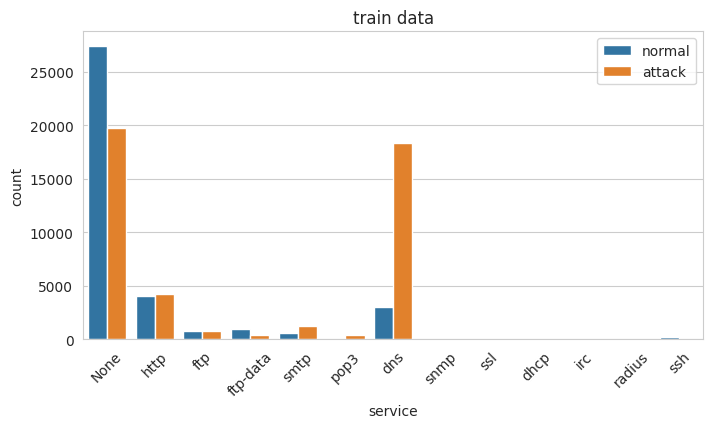

In [ ]:
col_countplot('service')

In [ ]:
train.drop('id',axis=1,inplace=True)
train.drop('attack_cat',axis=1,inplace=True)

In [ ]:

corr_matrix = train.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find index of feature columns with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

<ipython-input-23-8c69f877af2f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train.corr().abs()
<ipython-input-23-8c69f877af2f>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [ ]:
print(to_drop)

['sbytes', 'dbytes', 'sloss', 'dloss', 'dwin', 'synack', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'ct_ftp_cmd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports']


In [ ]:
train.shape

(82332, 43)

In [ ]:
todrop = ['sbytes', 'dbytes', 'sloss', 'dloss', 'dwin', 'synack', 'ackdat', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'ct_ftp_cmd', 'ct_srv_dst', 'is_sm_ips_ports']

In [ ]:
train.drop(columns=todrop, inplace=True)

In [ ]:
train.shape

(82332, 30)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dur                82332 non-null  float64
 1   proto              82332 non-null  object 
 2   service            82332 non-null  object 
 3   state              82332 non-null  object 
 4   spkts              82332 non-null  int64  
 5   dpkts              82332 non-null  int64  
 6   rate               82332 non-null  float64
 7   sttl               82332 non-null  int64  
 8   dttl               82332 non-null  int64  
 9   sload              82332 non-null  float64
 10  dload              82332 non-null  float64
 11  sinpkt             82332 non-null  float64
 12  dinpkt             82332 non-null  float64
 13  sjit               82332 non-null  float64
 14  djit               82332 non-null  float64
 15  swin               82332 non-null  int64  
 16  stcpb              823

In [ ]:
x_train, y_train = train.drop(columns=['label']), train['label']

In [ ]:
train.dtypes.value_counts()

int64      18
float64     9
object      3
dtype: int64

In [ ]:
train.select_dtypes(exclude=np.number).columns

Index(['proto', 'service', 'state'], dtype='object')

In [ ]:
cat_col = ['proto', 'service', 'state']
num_col = list(set(x_train.columns) - set(cat_col))

In [ ]:
scaler = StandardScaler()
scaler = scaler.fit(x_train[num_col])

In [ ]:
x_train[num_col] = scaler.transform(x_train[num_col])

In [ ]:
x_train.head()

,dur,proto,service,state,spkts,dpkts,rate,sttl,dttl,sload,...,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,is_ftp_login,ct_flw_http_mthd,ct_src_ltm
0,-0.213727,udp,None,INT,-0.124455,-0.151816,0.057181,0.71944,-0.820395,0.643913,...,0.520319,-0.475371,-0.173648,-0.04191,-0.680474,0.591021,-0.563660,-0.091123,-0.203143,-0.640033
1,-0.213728,udp,None,INT,-0.124455,-0.151816,0.286565,0.71944,-0.820395,4.539351,...,3.556716,-0.475371,-0.173648,-0.04191,-0.680474,0.591021,-0.563660,-0.091123,-0.203143,-0.640033
2,-0.213729,udp,None,INT,-0.124455,-0.151816,0.791209,0.71944,-0.820395,4.391459,...,1.892214,-0.475371,-0.173648,-0.04191,-0.590304,0.591021,-0.563660,-0.091123,-0.203143,-0.640033
3,-0.213729,udp,None,INT,-0.124455,-0.151816,0.566923,0.71944,-0.820395,2.977031,...,1.489280,-0.475371,-0.173648,-0.04191,-0.590304,0.591021,-0.444868,-0.091123,-0.203143,-0.522990
4,-0.213728,udp,None,INT,-0.124455,-0.151816,0.118350,0.71944,-0.820395,4.369219,...,4.429740,-0.475371,-0.173648,-0.04191,-0.590304,0.591021,-0.444868,-0.091123,-0.203143,-0.522990


In [ ]:
service_ = OneHotEncoder()
proto_ = OneHotEncoder()
state_ = OneHotEncoder()
ohe_service = service_.fit(x_train.service.values.reshape(-1,1))
ohe_proto = proto_.fit(x_train.proto.values.reshape(-1,1))
ohe_state = state_.fit(x_train.state.values.reshape(-1,1))

In [ ]:
for col, ohe in zip(['proto', 'service', 'state'], [ohe_proto, ohe_service, ohe_state]):
    x = ohe.transform(x_train[col].values.reshape(-1,1))
    tmp_df = pd.DataFrame(x.todense(), columns=[col+'_'+i for i in ohe.categories_[0]])
    x_train = pd.concat([x_train.drop(col, axis=1), tmp_df], axis=1)

In [ ]:
x_train.head()

,dur,spkts,dpkts,rate,sttl,dttl,sload,dload,sinpkt,dinpkt,...,service_snmp,service_ssh,service_ssl,state_ACC,state_CLO,state_CON,state_FIN,state_INT,state_REQ,state_RST
0,-0.213727,-0.124455,-0.151816,0.057181,0.71944,-0.820395,0.643913,-0.263498,-0.122179,-0.094169,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.213728,-0.124455,-0.151816,0.286565,0.71944,-0.820395,4.539351,-0.263498,-0.122180,-0.094169,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.213729,-0.124455,-0.151816,0.791209,0.71944,-0.820395,4.391459,-0.263498,-0.122180,-0.094169,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.213729,-0.124455,-0.151816,0.566923,0.71944,-0.820395,2.977031,-0.263498,-0.122180,-0.094169,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.213728,-0.124455,-0.151816,0.118350,0.71944,-0.820395,4.369219,-0.263498,-0.122179,-0.094169,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
y_train.shape, x_train.shape

((82332,), (82332, 177))

In [ ]:
#x_train.to_csv(path+'datasets/t_train.csv', index=False)
#y_train.to_csv(path+'datasets/p_test.csv', index=False)

In [ ]:
x= pd.read_csv(path+'datasets/p_train.csv')
y= pd.read_csv(path+'datasets/p_test.csv')

In [ ]:
train = x.join(y)

In [ ]:
test = x_train.join(y_train)

In [ ]:
train.shape, test.shape

((175341, 182), (82332, 178))

In [ ]:
common_features = list(set(train.columns) & set(test.columns))

In [ ]:
train = train[common_features]
test = test[common_features]

In [ ]:
train[common_features]

,service_ssh,proto_ifmp,proto_eigrp,proto_igmp,proto_secure-vmtp,service_pop3,response_body_len,proto_etherip,proto_sprite-rpc,state_FIN,...,proto_cbt,proto_ipcomp,proto_a/n,proto_crtp,proto_unas,proto_pri-enc,proto_ipv6-opts,proto_scps,dload,proto_tcf
0,0.0,0.0,0.0,0.0,0.0,0.0,-0.039557,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.273700,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,-0.039557,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.069233,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,-0.039557,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.252044,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,-0.039557,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.275821,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,-0.039557,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.275561,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,0.0,0.0,0.0,0.0,0.0,0.0,-0.039557,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.277208,0.0
175337,0.0,0.0,0.0,0.0,0.0,0.0,-0.039557,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.275183,0.0
175338,0.0,0.0,0.0,0.0,0.0,0.0,-0.039557,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.277208,0.0
175339,0.0,0.0,0.0,0.0,0.0,0.0,-0.039557,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.277208,0.0


In [ ]:
train = train.reindex(sorted(train.columns), axis=1)
test = test.reindex(sorted(test.columns), axis=1)

In [ ]:
train.shape, test.shape

((175341, 176), (82332, 176))

In [ ]:
x_train, y_train = train.drop(columns=['label']), train['label']
x_test, y_test = test.drop(columns=['label']), test['label']

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((175341, 175), (175341,), (82332, 175), (82332,))

In [ ]:
train.head()

,ct_dst_ltm,ct_flw_http_mthd,ct_src_ltm,ct_srv_src,ct_state_ttl,dinpkt,djit,dload,dmean,dpkts,...,state_CON,state_FIN,state_INT,state_REQ,state_RST,stcpb,sttl,swin,tcprtt,trans_depth
0,-0.645013,-0.189768,-0.715714,-0.775991,-1.366486,-0.080885,-0.145905,-0.273700,-0.314240,-0.135769,...,0.0,1.0,0.0,0.0,0.0,-0.256392,0.703839,1.092456,-0.521660,-0.136415
1,-0.645013,-0.189768,-0.715714,3.147666,-0.318711,-0.073735,0.192913,-0.069233,3.800869,0.172599,...,0.0,1.0,0.0,0.0,0.0,0.331031,-1.141901,1.092456,-0.521660,-0.136415
2,-0.520827,-0.189768,-0.595543,-0.215468,-0.318711,0.014711,2.663504,-0.252044,2.709185,-0.026933,...,0.0,1.0,0.0,0.0,0.0,0.846258,-1.141901,1.092456,0.888444,-0.136415
3,-0.520827,-0.189768,-0.595543,-0.775991,-0.318711,0.002046,1.080373,-0.275821,-0.232945,-0.063212,...,0.0,1.0,0.0,0.0,0.0,0.101729,-1.141901,1.092456,-0.521660,-0.136415
4,-0.520827,-0.189768,-0.595543,3.147666,-0.318711,-0.012721,-0.120301,-0.275561,-0.306498,-0.117630,...,0.0,1.0,0.0,0.0,0.0,1.082366,0.723268,1.092456,1.096172,-0.136415


In [ ]:
x_train.to_csv(path+'datasets/p2_train.csv', index=False)
y_train.to_csv(path+'datasets/p2_test.csv', index=False)

In [ ]:
test.shape

(82332, 176)

In [ ]:
test.to_csv(path+'datasets/t2_test.csv', index=False)